# Exploratory Data Analysis for Loan Default Prediction


In [2]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [12, 6]

/var/folders/q0/7qtgvcgn1sxg_2jgqvvm73wr0000gn/T/ipykernel_23458/2036430464.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
sys.path.append(os.path.abspath('../src'))
path_to_py = os.path.abspath('../src')

In [7]:
data = pd.read_csv(os.path.join(path_to_py, "data", "cleaned_train.csv"))
display(data.head())

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,internal_score,bad_flag,no_credit_card_history,no_derog_history,credit_limit_group,emp_length_missing
0,7550,36 months,16.24,3.0,RENT,28000.0,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72.0,4000.0,-1.0,3828.953801,5759.0,99,0.0,0,1,Q1,0
1,27050,36 months,10.99,10.0,OWN,55000.0,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.2,35700.0,-1.0,34359.940730,114834.0,353,0.0,0,1,Q5,0
2,12000,36 months,10.99,4.0,RENT,60000.0,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24.0,18100.0,-1.0,16416.617760,7137.0,157,0.0,0,1,Q3,0
3,28000,36 months,7.62,5.0,MORTGAGE,325000.0,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,-1.0,38014.149760,799592.0,365,0.0,0,1,Q5,0
4,12000,36 months,13.53,10.0,RENT,40000.0,debt_consolidation,33.3,79.6,16.94,0.0,17.0,68.8,7000.0,53.0,6471.462236,13605.0,157,0.0,0,0,Q2,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189457 entries, 0 to 189456
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    189457 non-null  int64  
 1   term                         189457 non-null  object 
 2   int_rate                     189457 non-null  float64
 3   emp_length                   189457 non-null  float64
 4   home_ownership               189457 non-null  object 
 5   annual_inc                   189457 non-null  float64
 6   purpose                      189457 non-null  object 
 7   percent_bc_gt_75             189457 non-null  float64
 8   bc_util                      189457 non-null  float64
 9   dti                          189457 non-null  float64
 10  inq_last_6mths               189457 non-null  float64
 11  mths_since_recent_inq        189457 non-null  float64
 12  revol_util                   189457 non-null  float64
 13 

In [9]:
df = data.copy()

## 1. Class Distribution Analysis

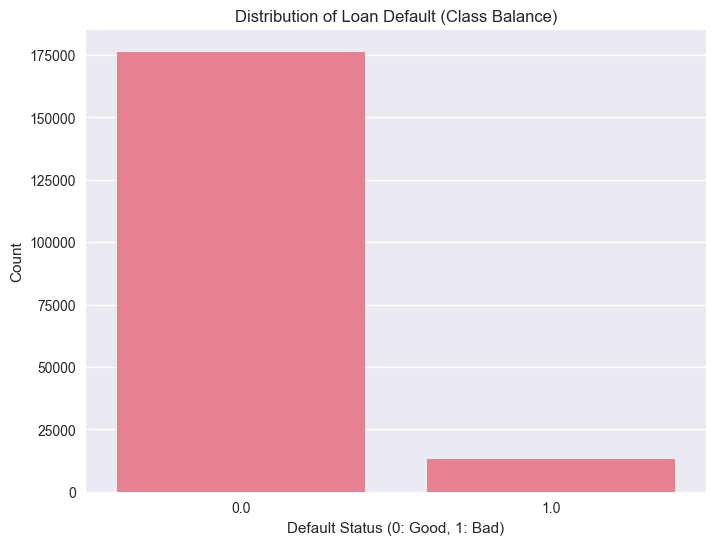


Class Distribution:
bad_flag
0.0    0.930707
1.0    0.069293
Name: proportion, dtype: float64


In [10]:
# 1. Overview of Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bad_flag')
plt.title('Distribution of Loan Default (Class Balance)')
plt.xlabel('Default Status (0: Good, 1: Bad)')
plt.ylabel('Count')
plt.show()

# Calculate and print class proportions
class_props = df['bad_flag'].value_counts(normalize=True)
print("\nClass Distribution:")
print(class_props)

### Class Imbalance
- Severe class imbalance observed: ~93.07% good loans (0) vs ~6.93% bad loans (1)
- Implications for NN design:
  - Need to implement class balancing techniques
  - Consider using class weights in loss function
  - Potentially use SMOTE or other oversampling techniques
  - Evaluate model using metrics suitable for imbalanced data (e.g., AUROC, precision-recall)

## 2. Numerical Features Analysis

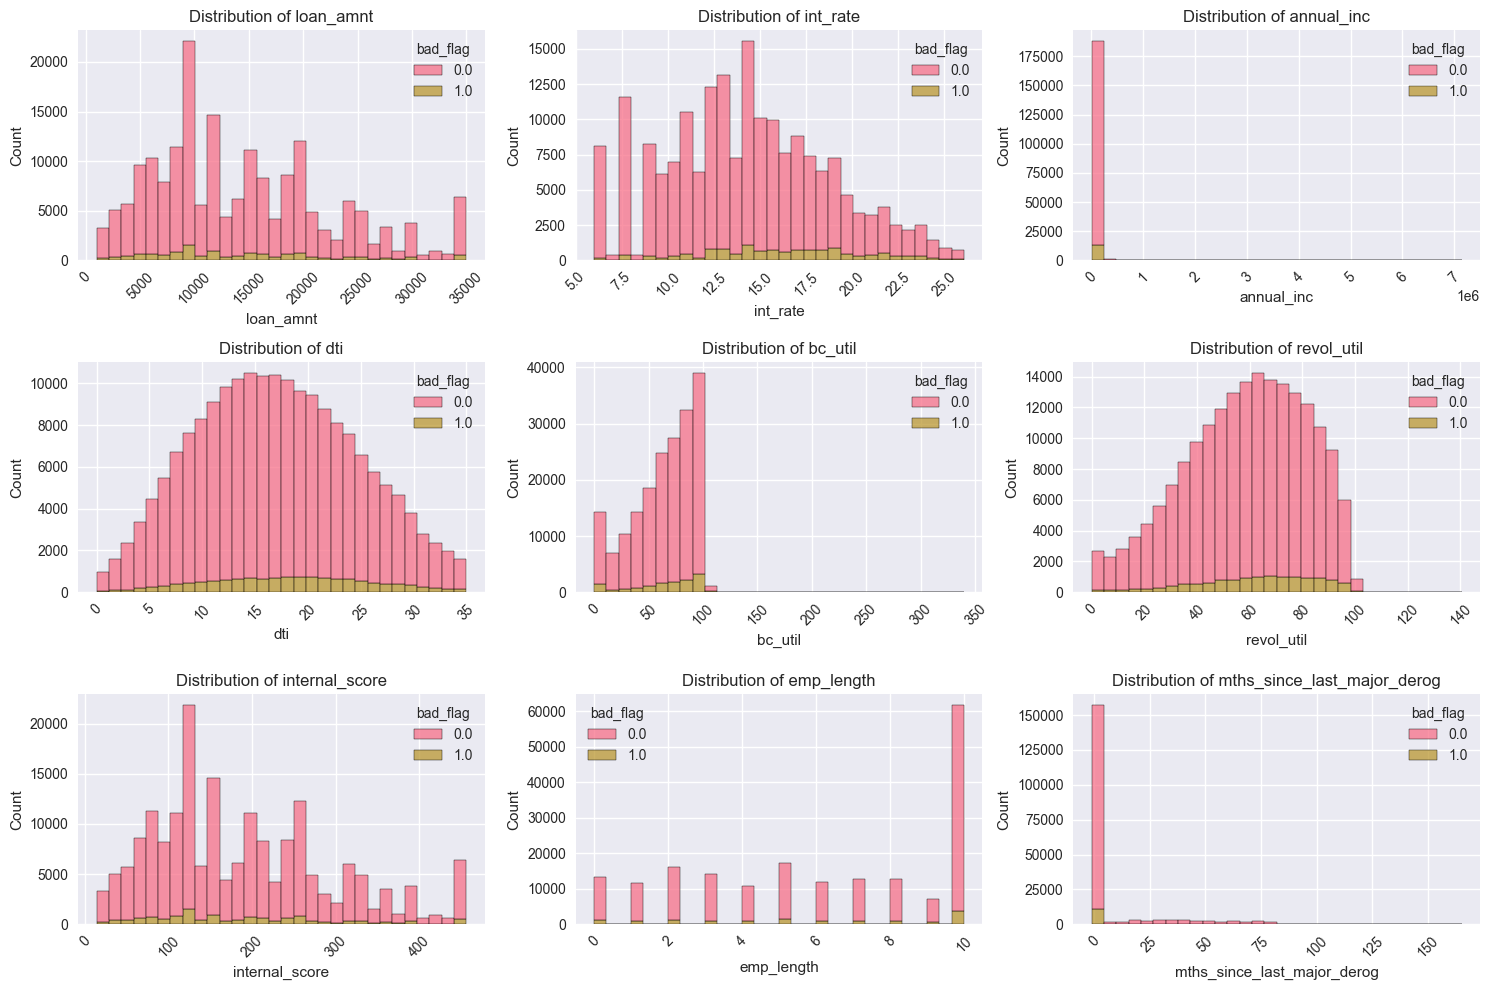

In [19]:
# 2. Numerical Features Distribution
# Create histograms with KDE for key numerical features
numerical_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 
                     'bc_util', 'revol_util', 'internal_score', 'emp_length', 'mths_since_last_major_derog']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, hue='bad_flag', multiple="stack", bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution Patterns
#### Loan Amount
- Multimodal distribution with peaks around 10000-15000
- Bad loans slightly more prevalent in higher loan amounts
- Recommendation: Consider log transformation

#### Interest Rate
- Strong predictor (highest positive correlation with defaults)
- Right-skewed distribution
- Higher interest rates show higher proportion of bad loans
- Recommendation: Keep as is, important feature

#### Annual Income
- Extremely right-skewed
- Negative correlation with defaults
- Recommendation: Apply log transformation for better distribution

#### DTI (Debt-to-Income)
- Relatively normal distribution
- Slight positive correlation with defaults
- Recommendation: Standard scaling should be sufficient

#### Utilization Metrics (bc_util, revol_util)
- Similar patterns between both metrics (0.73 correlation)
- Right-skewed distributions
- Moderate positive correlation with defaults
- Recommendation: Consider feature interaction or selecting one to avoid multicollinearity

## 3. Feature Correlations

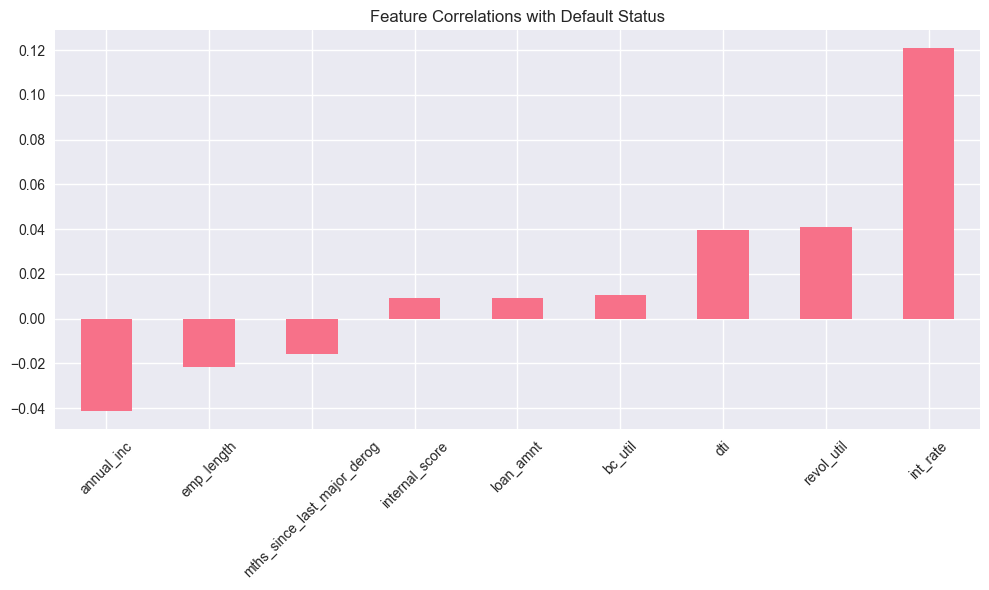

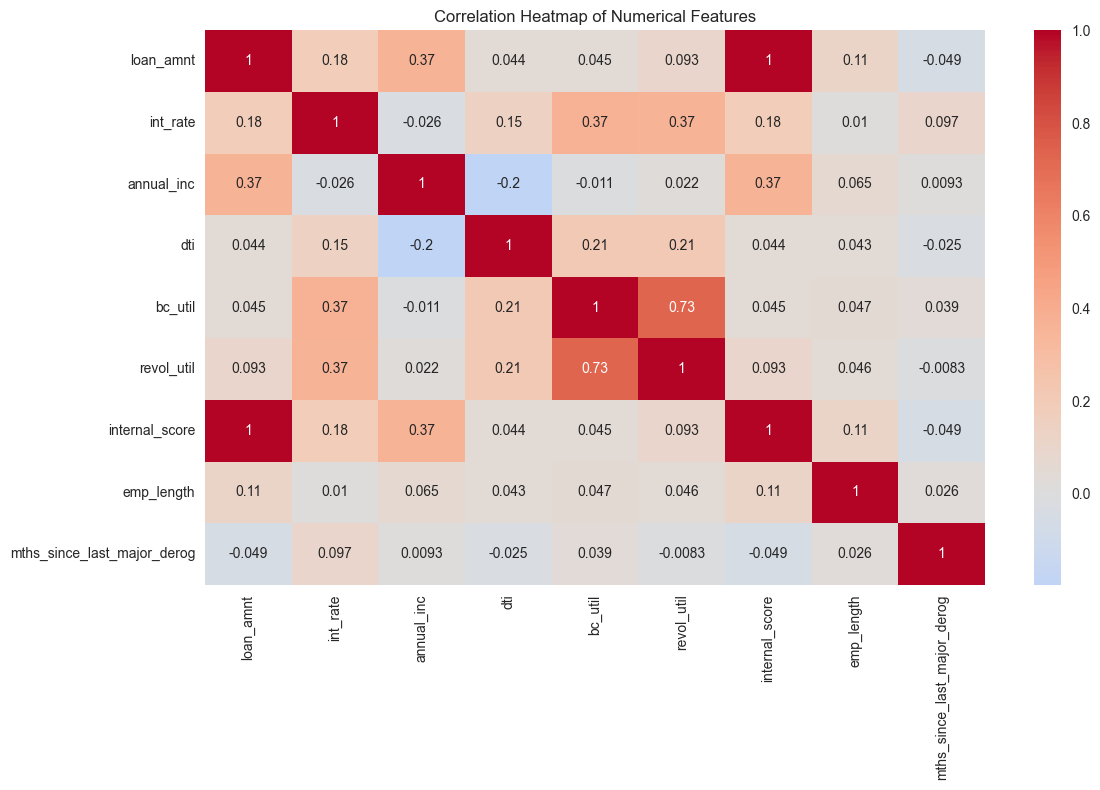

In [20]:
# 3. Correlation Analysis
# Calculate correlations with target variable
correlations = df[numerical_features + ['bad_flag']].corr()['bad_flag'].sort_values()
plt.figure(figsize=(10, 6))
correlations.drop('bad_flag').plot(kind='bar')
plt.title('Feature Correlations with Default Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

### Key Correlation Findings
- Strongest predictors of default (in order):
  1. Interest rate (positive correlation)
  2. Revolving utilization (positive)
  3. Annual income (negative)
  4. DTI (positive)
  
### Multicollinearity Considerations
- Perfect correlation (1.0) between loan_amount and internal_score siggests redundant information
- High correlation (0.73) between bc_util and revol_util
- Moderate correlation (0.37) between loan_amount and annual_income
- Recommendation: Consider feature selection or dimensionality reduction

## 4. Categorical Features Analysis

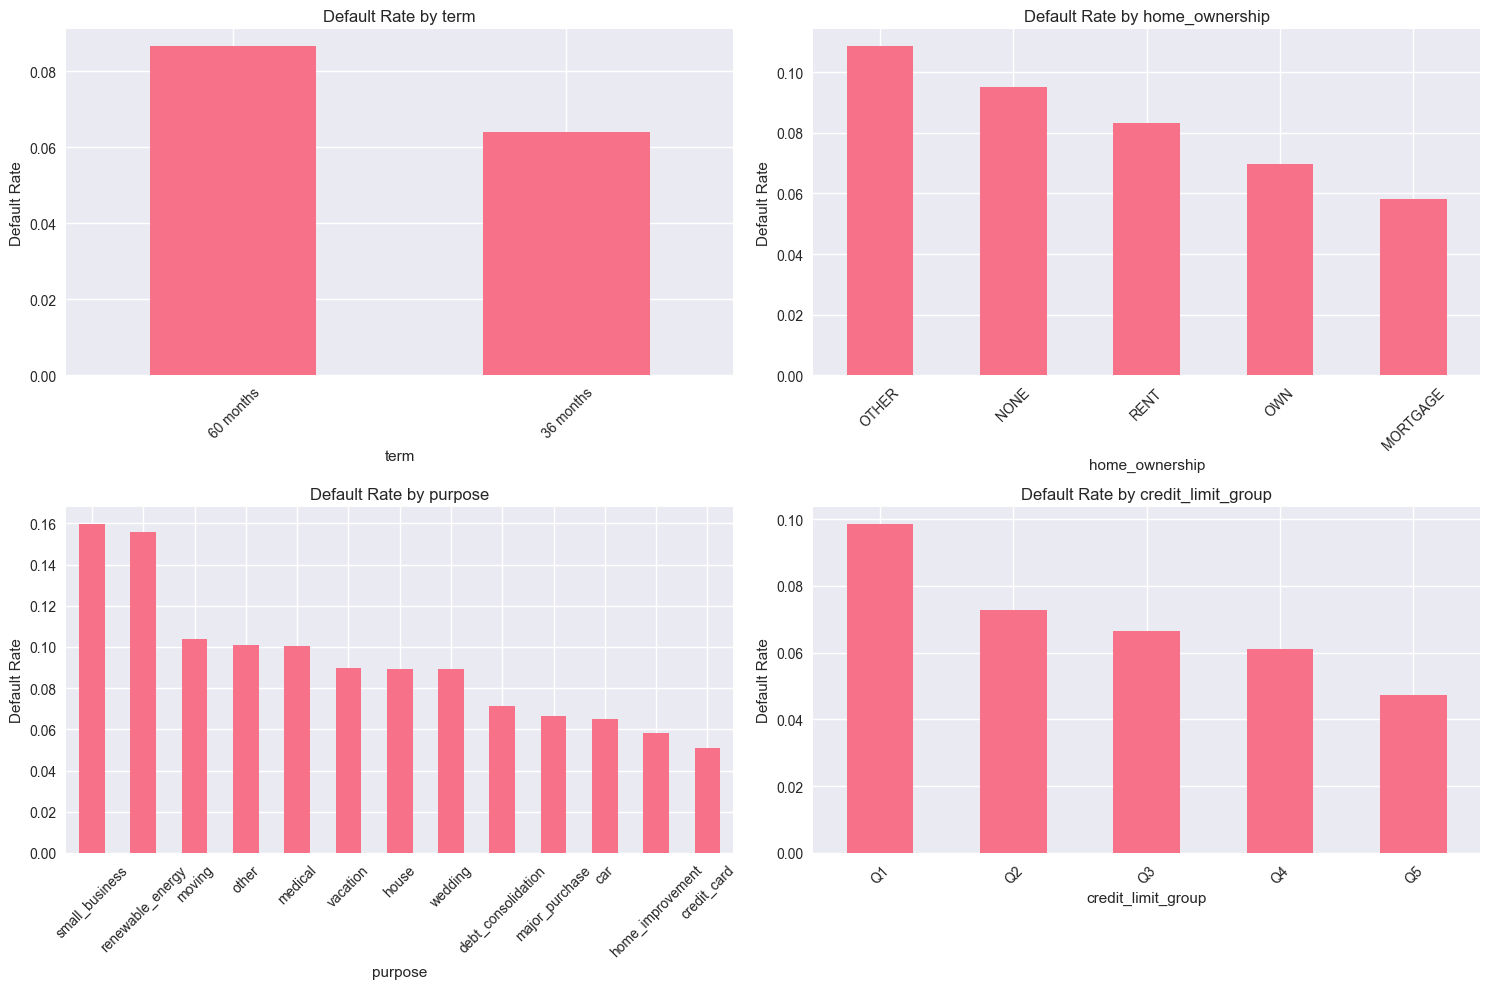

In [13]:
# 4. Categorical Features Analysis
categorical_features = ['term', 'home_ownership', 'purpose', 'credit_limit_group']

# Default rates by categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    default_rates = df.groupby(feature)['bad_flag'].mean().sort_values(ascending=False)
    default_rates.plot(kind='bar')
    plt.title(f'Default Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Default Rate')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Default Rates by Category
#### Loan Term
- 60-month terms show higher default rates than 36-month terms
- Recommendation: One-hot encode term

#### Home Ownership
- Clear risk pattern: OTHER > NONE > RENT > OWN > MORTGAGE
- Recommendation: 
  - Maintain original categories in encoding
  - Consider ordinal encoding based on risk levels

#### Loan Purpose
- Small business and renewable energy loans show highest default rates
- Credit card and home improvement show lowest
- Recommendation: 
  - Group low-frequency categories
  - Create risk-based category groupings

#### Credit Limit Group
- Clear monotonic relationship with default rate
- Recommendation: Consider ordinal encoding

## 5. Box Plot Analysis

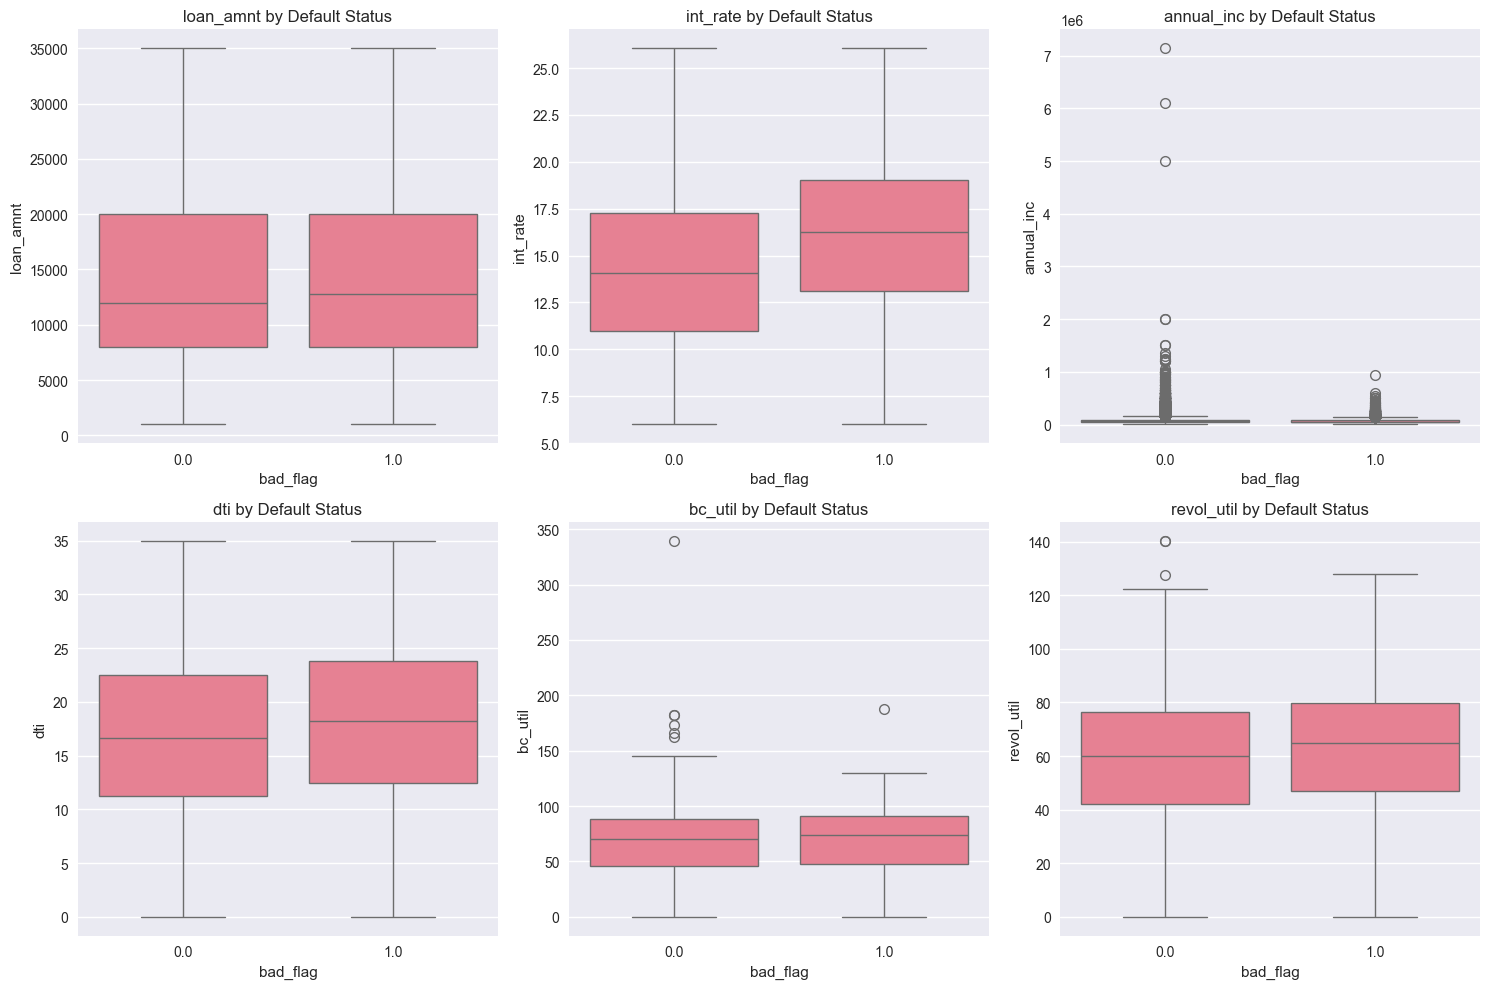

In [14]:
# 5. Box Plots for Numerical Features by Default Status
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='bad_flag', y=feature)
    plt.title(f'{feature} by Default Status')
plt.tight_layout()
plt.show()


### Analysis and Insights

#### Interest Rate and Default Risk
- Clear separation in interest rate distributions between good and bad loans
- Bad loans have consistently higher median interest rates (16.24% vs 14.14%)
- Interquartile range for bad loans is shifted upward
- Suggests interest rate is a strong predictor of default risk

#### DTI (Debt-to-Income) Patterns
- Bad loans show slightly higher median DTI (18.16 vs 16.98)
- Similar spread in both groups but bad loans skew higher
- Presence of outliers in both groups above 30%
- Important feature but less discriminative than interest rate

#### Utilization Metrics (bc_util and revol_util)
- Both utilization metrics show similar patterns
- Bad loans have higher median utilization rates
- revol_util shows clearer separation between groups
- Notable outliers in bc_util above 150%
- Strong evidence that higher credit utilization indicates higher risk

#### Annual Income Distribution
- Good loans show higher median income ($63,000 vs $55,000)
- Significant number of high-income outliers in good loans
- Income appears to be a protective factor against default
- Log transformation needed due to extreme right skew

## 6. Feature Relationships

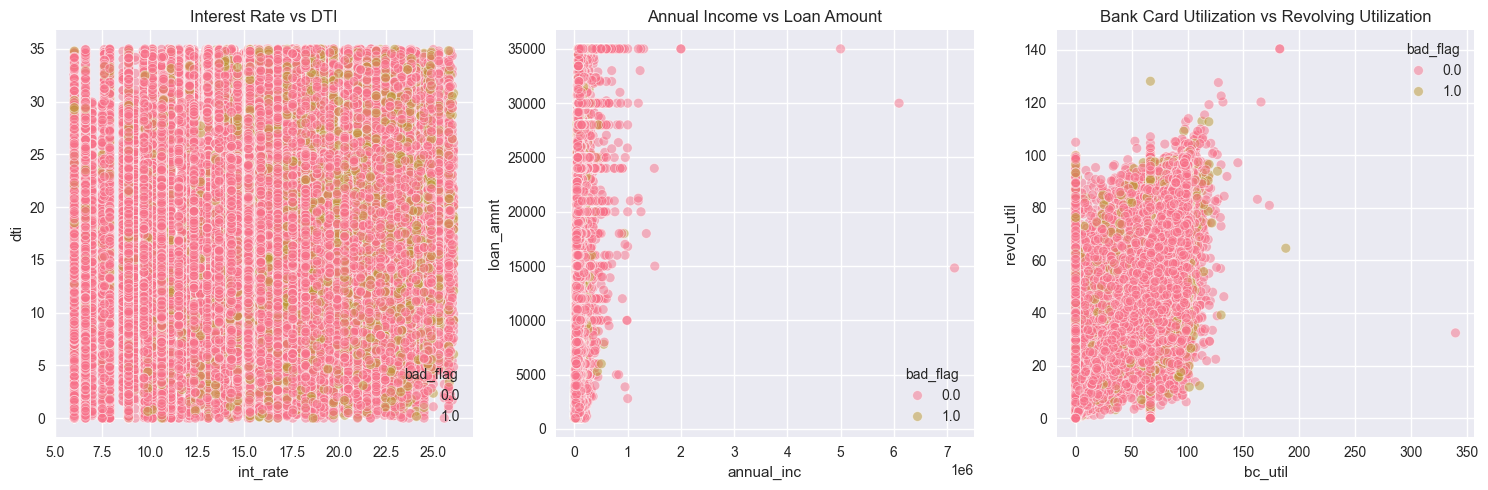

In [15]:
# 6. Feature Relationships
# Scatter plots of key numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='int_rate', y='dti', hue='bad_flag', alpha=0.5)
plt.title('Interest Rate vs DTI')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='annual_inc', y='loan_amnt', hue='bad_flag', alpha=0.5)
plt.title('Annual Income vs Loan Amount')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='bc_util', y='revol_util', hue='bad_flag', alpha=0.5)
plt.title('Bank Card Utilization vs Revolving Utilization')
plt.tight_layout()
plt.show()

## 7. Statistical Significance Analysis

In [21]:
# 7. Statistical Analysis
# Print summary statistics for numerical features by default status
print("\nSummary Statistics by Default Status:")
print(df.groupby('bad_flag')[numerical_features].describe())

# Perform t-tests for numerical features
print("\nStatistical Tests (T-tests):")
for feature in numerical_features:
    good_loans = df[df['bad_flag'] == 0][feature].dropna()
    bad_loans = df[df['bad_flag'] == 1][feature].dropna()
    t_stat, p_value = stats.ttest_ind(good_loans, bad_loans)
    print(f"{feature}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")



Summary Statistics by Default Status:
         loan_amnt                                                      \
             count          mean          std     min     25%      50%   
bad_flag                                                                 
0.0       176329.0  14333.472798  8089.910938  1000.0  8000.0  12000.0   
1.0        13128.0  14624.544866  8400.381698  1000.0  8000.0  12800.0   

                            int_rate                                          \
              75%      max     count       mean       std  min    25%    50%   
bad_flag                                                                       
0.0       20000.0  35000.0  176329.0  14.136541  4.413171  6.0  10.99  14.09   
1.0       20000.0  35000.0   13128.0  16.246096  4.303476  6.0  13.11  16.24   

                       annual_inc                                      \
            75%    max      count          mean           std     min   
bad_flag                                   

#### T-Test Results Interpretation
- All features show statistically significant differences (p < 0.001)
- Strongest discriminating power:
 1. Interest rate (t = -52.928)
 2. Annual income (t = 17.977)
 3. Revolving utilization (t = -17.901)
 4. DTI (t = -17.268)
- Features retain predictive power despite class imbalance

#### Mean Differences Analysis
- Interest rate shows largest standardized difference
- Annual income shows consistent protective effect
- DTI differences smaller but highly consistent
- Utilization metrics show moderate but reliable differences


In [17]:
# 8. Key Insights Summary
print("\nKey Insights:")
print("1. Class Imbalance Analysis:")
print(f"   - Percentage of good loans: {class_props[0]*100:.2f}%")
print(f"   - Percentage of bad loans: {class_props[1]*100:.2f}%")

print("\n2. Most Important Features (by correlation with default):")
for feature, corr in correlations.drop('bad_flag').abs().sort_values(ascending=False).head().items():
    print(f"   - {feature}: {corr:.4f}")

print("\n3. Categorical Feature Insights:")
for feature in categorical_features:
    default_rates = df.groupby(feature)['bad_flag'].mean().sort_values(ascending=False)
    print(f"\n   {feature}:")
    print(f"   - Highest default rate: {default_rates.index[0]} ({default_rates.iloc[0]*100:.2f}%)")
    print(f"   - Lowest default rate: {default_rates.index[-1]} ({default_rates.iloc[-1]*100:.2f}%)")


Key Insights:
1. Class Imbalance Analysis:
   - Percentage of good loans: 93.07%
   - Percentage of bad loans: 6.93%

2. Most Important Features (by correlation with default):
   - int_rate: 0.1207
   - annual_inc: 0.0413
   - revol_util: 0.0411
   - dti: 0.0396
   - bc_util: 0.0107

3. Categorical Feature Insights:

   term:
   - Highest default rate:  60 months (8.67%)
   - Lowest default rate:  36 months (6.39%)

   home_ownership:
   - Highest default rate: OTHER (10.87%)
   - Lowest default rate: MORTGAGE (5.83%)

   purpose:
   - Highest default rate: small_business (15.99%)
   - Lowest default rate: credit_card (5.07%)

   credit_limit_group:
   - Highest default rate: Q1 (9.87%)
   - Lowest default rate: Q5 (4.73%)


## 8. Business and Modeling Implications

#### Risk Assessment Based on Statistical Evidence

1. Interest Rate Patterns
   - Bad loans have significantly higher mean rates (16.25% vs 14.14%)
   - T-statistic of -52.928 shows this is our strongest discriminator
   - Clear separation visible in box plots between default/non-default groups
   - Highest correlation with default status (0.1207)

2. Income Characteristics
   - Good loans show higher mean income ($72,826 vs $64,408)
   - High variance in both groups (std: $52,604 for good loans, $38,684 for bad)
   - Negative correlation with defaults indicates protective effect
   - Box plots show significant outliers, suggesting need for log transformation

3. Utilization Metrics
   - Bad loans show higher mean utilization (revol_util: 61.86% vs 58.13%)
   - Strong correlation between bc_util and revol_util (0.73)
   - Both metrics show similar patterns in relation to defaults
   - Statistical significance in t-tests (p < 0.001) for both metrics

4. DTI (Debt-to-Income)
   - Bad loans have higher mean DTI (18.16 vs 16.98)
   - Similar standard deviations (7.68 vs 7.58) suggest consistent spread
   - T-statistic of -17.2678 indicates strong statistical significance
   - Box plots show overlapping distributions but clear shift in medians

#### Feature Importance Based on Statistical Evidence

1. Primary Predictors (Based on t-statistics and correlations):
   - Interest rate (highest t-stat: -52.928)
   - Revolving utilization (t-stat: -17.901)
   - DTI (t-stat: -17.268)

2. Categorical Risk Factors (Based on default rates):
   - Loan Purpose: 
     * Highest risk: Small business (15.99% default rate)
     * Lowest risk: Credit card (5.07% default rate)
   - Home Ownership:
     * Highest risk: OTHER (10.87% default rate)
     * Lowest risk: MORTGAGE (5.83% default rate)

3. Term Effect:
   - 60-month loans show higher default rate (8.67%)
   - 36-month loans show lower default rate (6.39%)

#### Model Design Implications

1. Distribution Considerations:
   - Log transformation needed for annual income (heavy right skew)
   - Standard scaling appropriate for DTI (normal distribution)
   - Interest rate and utilization metrics can use standard scaling

2. Feature Engineering Priorities:
   - Combine highly correlated utilization metrics
   - Create normalized income-to-loan ratios
   - Consider interaction terms between interest rate and DTI

3. Class Imbalance Handling:
   - Precise split: 93.07% good loans vs 6.93% bad loans
   - Requires appropriate class weights or sampling techniques

## --- Next Steps ---

### 1. Data Preparation
- Feature transformations (log, scaling)
- Feature engineering
- Categorical encoding
- Handle class imbalance
- Train-test split

### 2. Neural Network Implementation
- Model architecture
- Training configuration
- Evaluation setup

**Note**: To be continued with data preparation in 04.data_preparation.ipynb

# --- END OF NOTEBOOK ---